https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html
https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/
https://monashbioinformaticsplatform.github.io/r-intro/
https://r4ds.had.co.nz/
https://ggplot2-book.org/
https://www.practicaldatascience.org/html/plotting_part2.html


In [2]:
%matplotlib inline
import plotnine as p9
from plotnine import theme, element_rect, element_blank, element_line, element_text

In [3]:
import pandas as pd
import numpy as np

surveys_complete = pd.read_csv("C:\\PyCharm\\Visualization\\data\\surveys.csv")
surveys_complete = surveys_complete.dropna()

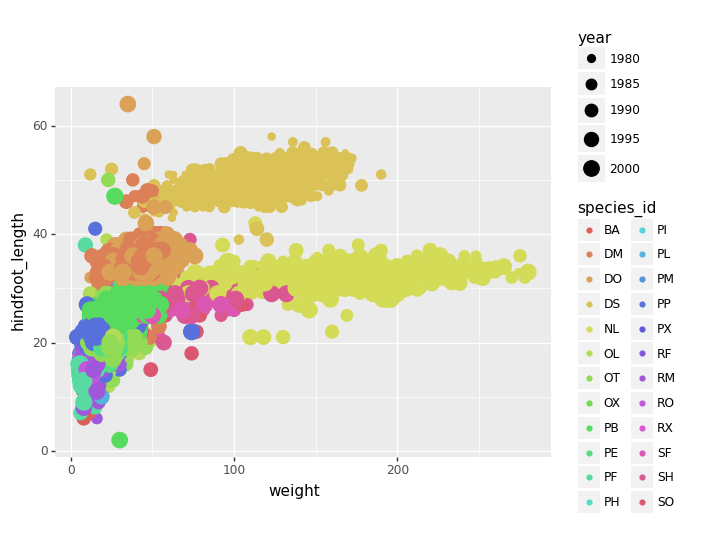

<ggplot: (-9223371933823463816)>

In [75]:
# Create
surveys_plot = p9.ggplot(data=surveys_complete,
                         mapping=p9.aes(x='weight', y='hindfoot_length', size = 'year', color = 'species_id'))

# Draw the plot
surveys_plot + p9.geom_point()

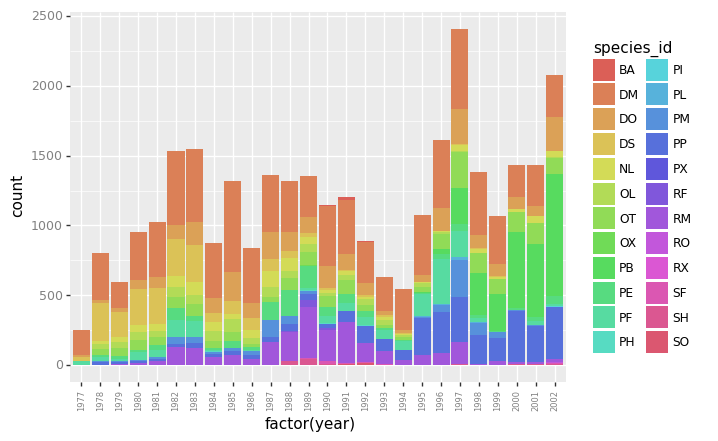

<ggplot: (-9223371901340882948)>

In [125]:
custom_axis = p9.theme(axis_text_x = p9.element_text(color="grey", size=6, angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="grey", size=9))
flip_xlabels = p9.theme(axis_text_x = p9.element_text(size=6, angle=90, hjust=1))
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='factor(year)', fill = 'species_id')) 
 + p9.geom_bar(stat='count') + custom_axis )

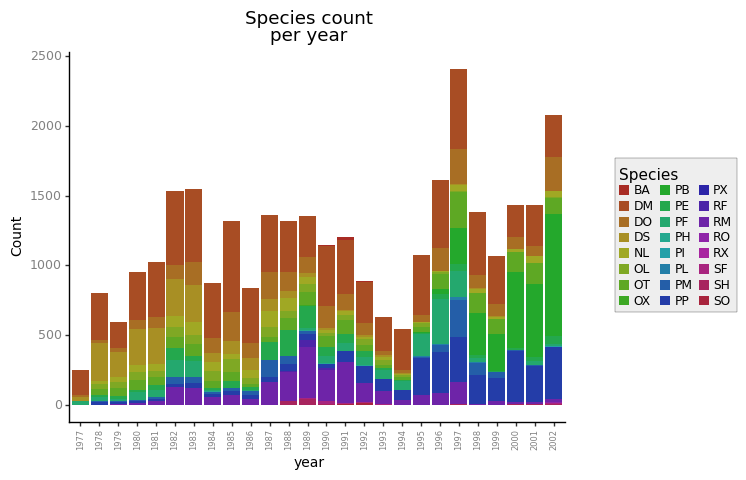

<ggplot: (-9223371935691919980)>

In [95]:
# https://dputhier.github.io/jgb53d-bd-prog_github/practicals/intro_ggplot/intro_ggplot.html
# https://nceas.github.io/oss-lessons/dataviz-and-interactive-tools/module-1-ggplot2.html
# http://www.xavierdupre.fr/app/jupytalk/helpsphinx/notebooks/im_plotnine.html
# https://plotnine.readthedocs.io/en/stable/api.html
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme.html
# https://ggplot2.tidyverse.org/reference/guide_legend.html#examples
custom_axis = p9.theme(axis_text_x = p9.element_text(color="grey", size=6, angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="grey", size=9), axis_title = p9.element_text(size = 10))
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='factor(year)', fill = 'species_id')) + 
 p9.geom_bar(stat='count', width=.9) + p9.scale_fill_hue(l=.40) + 
 p9.theme_classic() + 
#  Legend config:
 p9.theme(legend_position='right', legend_background = element_rect(fill = "#EEEEEE", color = "black", size=.2),
        legend_box_margin= 1, legend_box_spacing = .5) +
 p9.guides(fill = p9.guide_legend(title = "Species", title_position= "top", 
                                  title_hjust= 40, nrow=8, keywidth=7, keyheight=7)) +
 custom_axis + p9.ggtitle("Species count\nper year") + p9.xlab("year") +p9.ylab('Count')
)


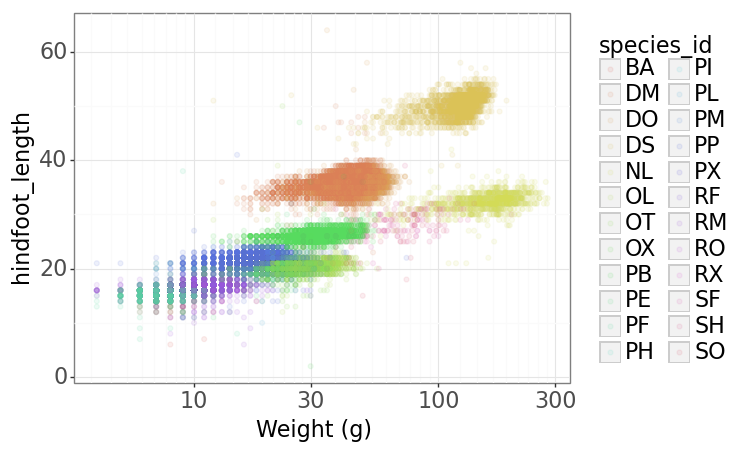

<ggplot: (-9223371933830242948)>

In [29]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
    + p9.scale_x_log10()
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16))
)

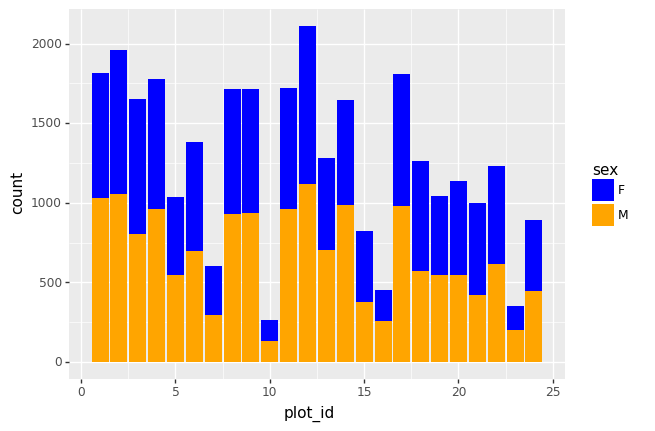

<ggplot: (-9223371933838222880)>

In [46]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id', fill='sex'))
 + p9.geom_bar() + p9.scale_fill_manual(["blue", "orange"]))

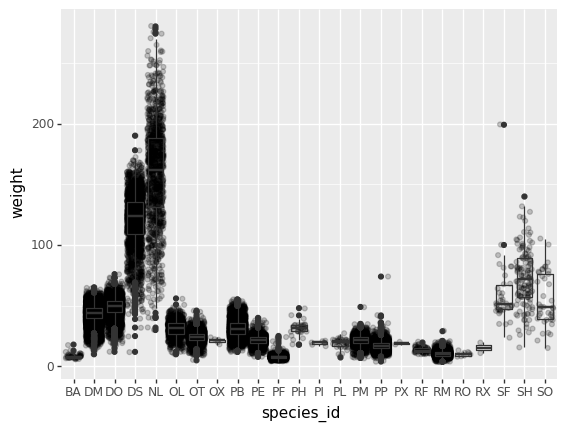

<ggplot: (-9223371933837985616)>

In [48]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
)

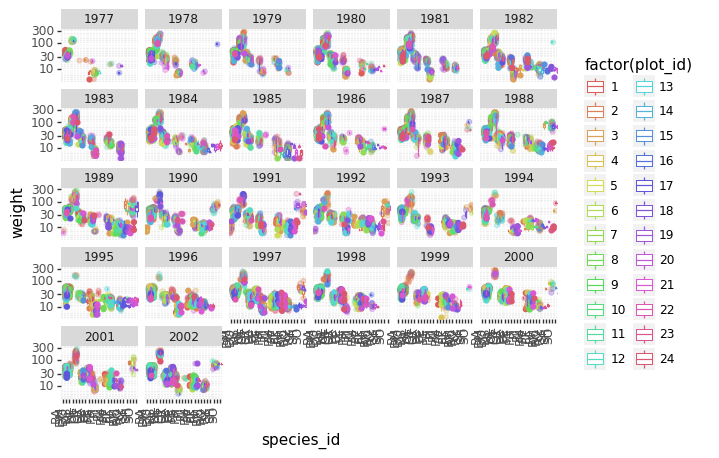

<ggplot: (-9223371933835970140)>

In [73]:
(p9.ggplot(data=surveys_complete,  
           mapping=p9.aes(color = 'factor(plot_id)', x='species_id',
                          y='weight')) + p9.geom_jitter(alpha=0.3)
    + p9.geom_boxplot() + p9.facet_wrap(['year']) + p9.theme(axis_text_x = p9.element_text(angle=90, hjust=1)) + p9.scale_y_log10() 
 )


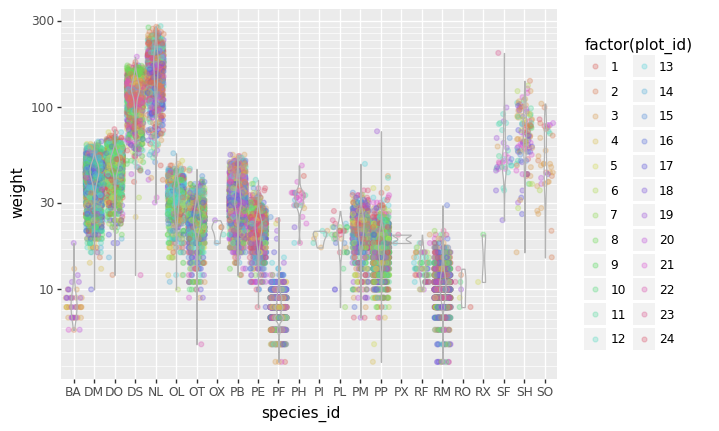

<ggplot: (-9223371933835843104)>

In [53]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight',
                          color='factor(plot_id)'))
    + p9.geom_jitter(alpha=0.3)
    + p9.geom_violin(alpha=0, color="0.7")
    + p9.scale_y_log10()
)

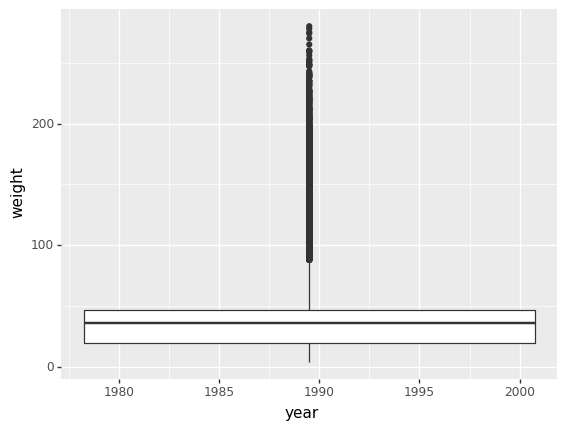

<ggplot: (-9223371901342629704)>

In [3]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='year', y='weight')) + 
    p9.geom_boxplot())

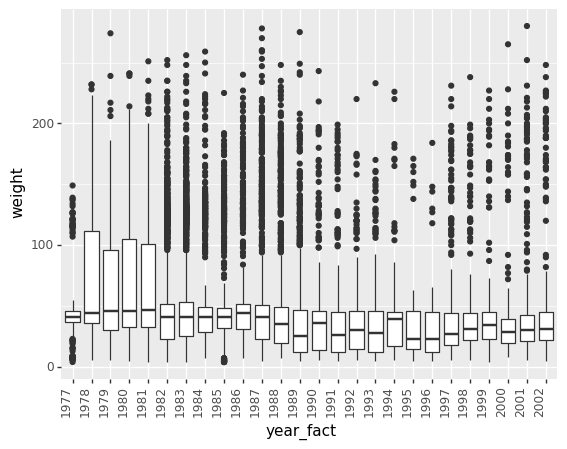

<ggplot: (-9223371901341152424)>

In [10]:
flip_xlabels = p9.theme(axis_text_x = p9.element_text(angle=90, hjust=1))
surveys_complete['year_fact'] = surveys_complete['year'].astype("category")
p9.ggplot(surveys_complete, p9.aes(x='year_fact', y='weight')) + \
    p9.geom_boxplot() + flip_xlabels

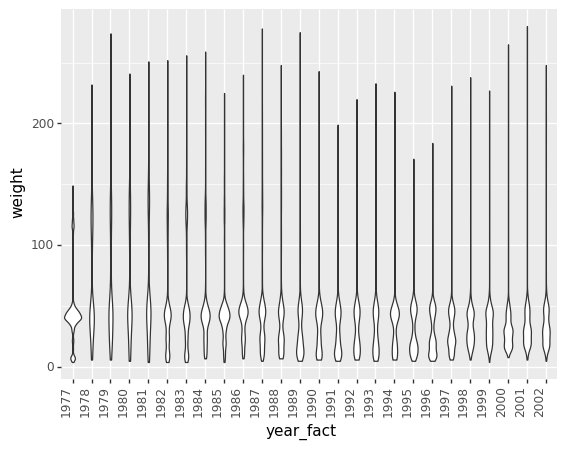

<ggplot: (-9223371901341030812)>

In [12]:
p9.ggplot(surveys_complete, p9.aes(x='year_fact', y='weight')) + \
    p9.geom_violin() + \
    flip_xlabels

In [87]:
plt1 = p9.ggplot(surveys_complete, p9.aes(x='year_fact', y='weight')) + \
           p9.geom_boxplot() + \
           p9.xlab("Years") + \
           p9.ylab("Weight log2(kg)") + \
           p9.ggtitle("Boxplots, summary of species weight in each year")

p9.ggsave(filename="plot1.png",
       plot=plt1,
       device='png',
       dpi=300,
       height=25,
       width=25)



my_plot = (p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)
my_plot.save("scatterplot.png", width=10, height=10, dpi=300)





C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 25 x 25 in image.
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: plot1.png
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: scatterplot.png


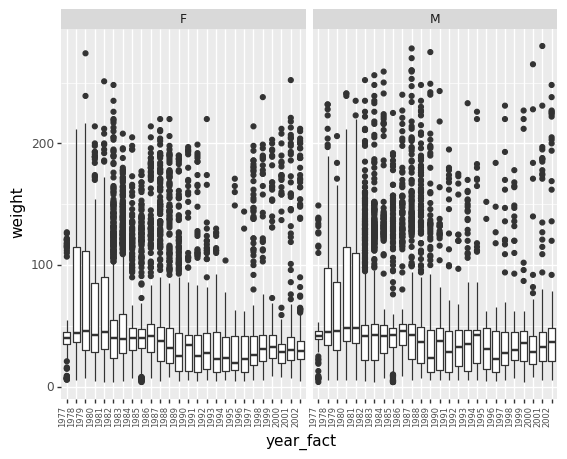

<ggplot: (-9223371901340547888)>

In [17]:
p9.ggplot(surveys_complete, p9.aes(x='year_fact', y='weight')) + \
    p9.geom_boxplot() + \
    p9.facet_wrap(['sex']) + \
    flip_xlabels + \
    p9.theme(axis_text_x = p9.element_text(size=6))

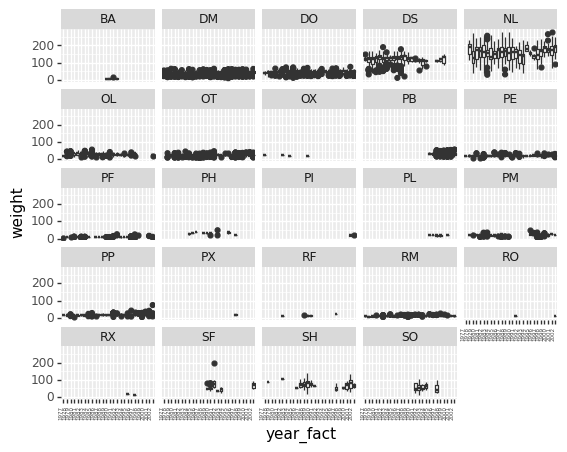

<ggplot: (-9223371901340674756)>

In [18]:
p9.ggplot(surveys_complete, p9.aes(x='year_fact', y='weight')) + \
    p9.geom_boxplot() + \
    p9.theme(axis_text_x = p9.element_text(size=4)) + \
    p9.facet_wrap(['species_id']) + \
    flip_xlabels

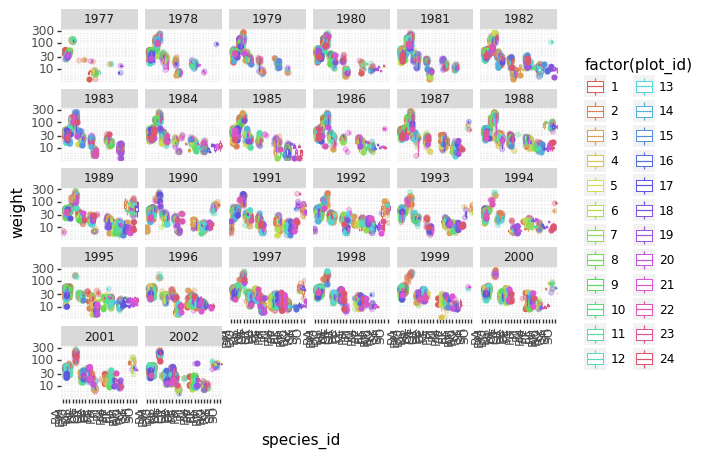

<ggplot: (-9223371901339743304)>

In [19]:
(p9.ggplot(data=surveys_complete,  
           mapping=p9.aes(color = 'factor(plot_id)', x='species_id',
                          y='weight')) + p9.geom_jitter(alpha=0.3)
    + p9.geom_boxplot() + p9.facet_wrap(['year']) + p9.theme(axis_text_x = p9.element_text(angle=90, hjust=1)) + p9.scale_y_log10() 
 )


In [24]:
surveys_complete['weight_log'] = np.log2(surveys_complete['weight'])

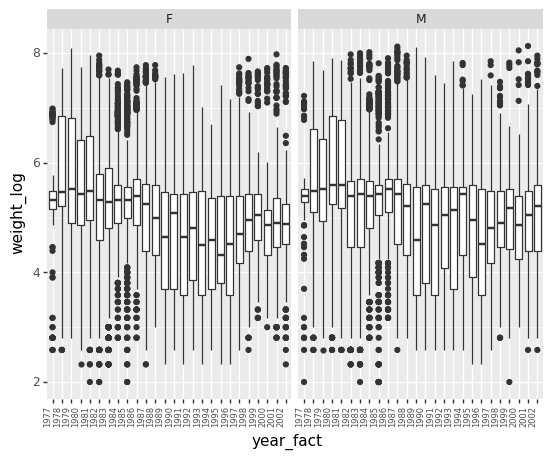

<ggplot: (-9223371901326998092)>

In [25]:
p9.ggplot(surveys_complete, p9.aes(x='year_fact', y='weight_log')) + \
    p9.geom_boxplot() + \
    p9.facet_wrap(['sex']) + \
    flip_xlabels + \
    p9.theme(axis_text_x = p9.element_text(size=6))

In [23]:
print (surveys_complete, 2)

       record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
62            63      8   19  1977        3         DM   M             35.0   
63            64      8   19  1977        7         DM   M             37.0   
64            65      8   19  1977        4         DM   F             34.0   
65            66      8   19  1977        4         DM   F             35.0   
66            67      8   19  1977        7         DM   M             35.0   
...          ...    ...  ...   ...      ...        ...  ..              ...   
35540      35541     12   31  2002       15         PB   F             24.0   
35541      35542     12   31  2002       15         PB   F             26.0   
35542      35543     12   31  2002       15         PB   F             27.0   
35546      35547     12   31  2002       10         RM   F             15.0   
35547      35548     12   31  2002        7         DO   M             36.0   

       weight year_fact  weight_log  
62       40.0

In [30]:
s = pd.Series(["a", "b", "c", "a"])
s

0    a
1    b
2    c
3    a
dtype: object

In [31]:
s2 = s.astype('category')
s2

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

In [32]:
s2.astype(str)

0    a
1    b
2    c
3    a
dtype: object

In [33]:
 np.asarray(s2)

array(['a', 'b', 'c', 'a'], dtype=object)

In [34]:
 np.asarray(s)

array(['a', 'b', 'c', 'a'], dtype=object)

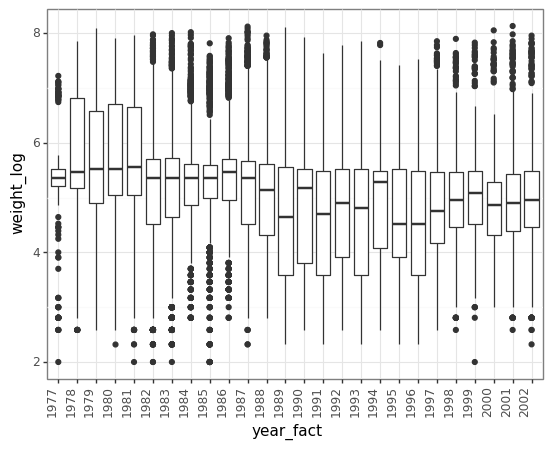

<ggplot: (-9223371901327242772)>

In [36]:
p9.ggplot(surveys_complete, p9.aes(x='year_fact', y='weight_log')) + \
    p9.geom_boxplot() + \
    p9.theme_bw() + \
    flip_xlabels

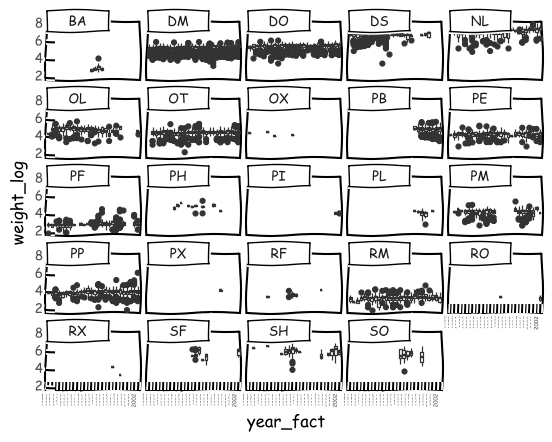

<ggplot: (-9223371901339319000)>

In [38]:
flip_xlabel2 = p9.theme(axis_text_x = p9.element_text(size=4, angle=90, hjust=1))


p9.ggplot(surveys_complete, p9.aes(x='year_fact', y='weight_log')) + \
    p9.geom_boxplot() + \
    p9.facet_wrap(['species_id']) + \
    p9.theme_xkcd() + flip_xlabel2


In [39]:
bins = [(surveys_complete['year'] < 1980),
        (surveys_complete['year'] < 1990),
        (surveys_complete['year'] < 2000),
        (surveys_complete['year'] >= 2000)]

labels = ['70s', '80s', '90s', 'Z']

surveys_complete['year_bins'] = np.select(bins, labels)

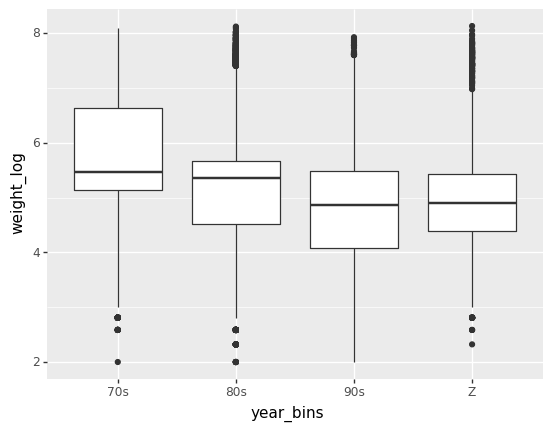

<ggplot: (-9223371901324090768)>

In [42]:
plt2 = p9.ggplot(surveys_complete, p9.aes(x='year_bins', y='weight_log')) + \
           p9.geom_boxplot()
plt2

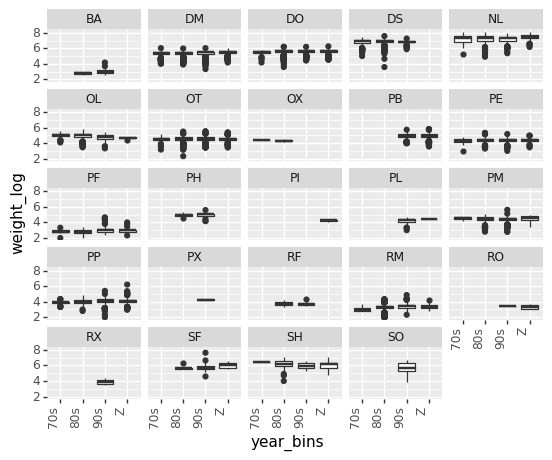

<ggplot: (-9223371901324082780)>

In [44]:
plt2 = p9.ggplot(surveys_complete, p9.aes(x='year_bins', y='weight_log')) + \
           p9.geom_boxplot() + \
           flip_xlabels + \
           p9.facet_wrap(['species_id'])
plt2

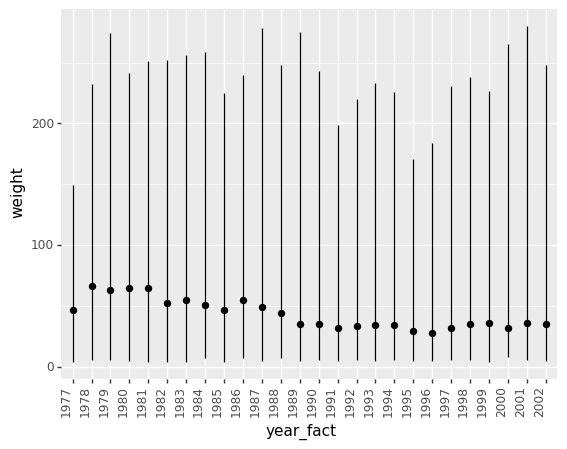

<ggplot: (-9223371901324090784)>

In [45]:
p9.ggplot(surveys_complete, p9.aes("year_fact", "weight")) + \
    p9.stat_summary(fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + \
    flip_xlabels


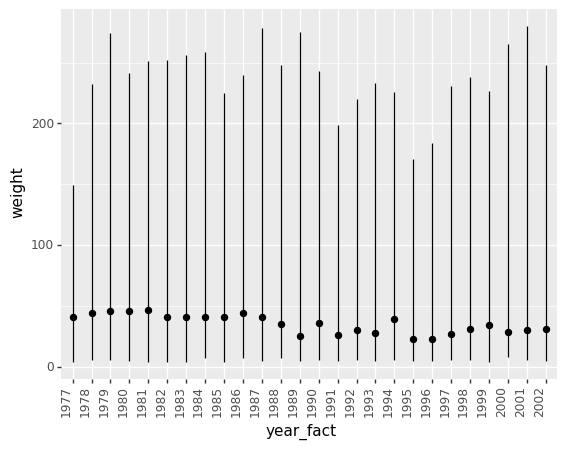

<ggplot: (-9223371901339108016)>

In [46]:
p9.ggplot(surveys_complete, p9.aes("year_fact", "weight")) + \
    p9.stat_summary(fun_y = np.median, fun_ymin=np.min, fun_ymax=np.max) + \
    flip_xlabels

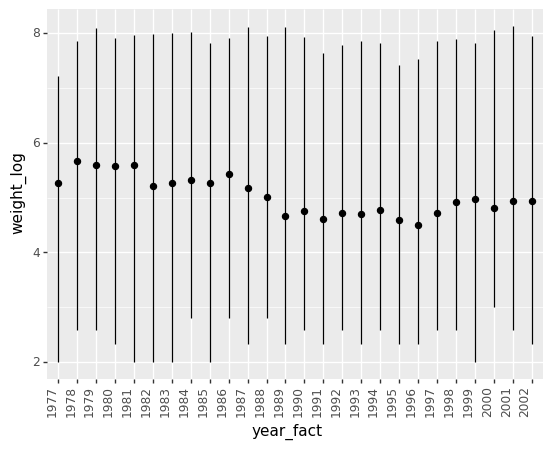

<ggplot: (-9223371901327997096)>

In [47]:
p9.ggplot(surveys_complete, p9.aes("year_fact", "weight_log")) + \
    p9.stat_summary(fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + \
    flip_xlabels

In [48]:
yearly_counts = surveys_complete.groupby(['year', 'species_id'])['species_id'].count()
yearly_counts

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64

In [69]:
# yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts = surveys_complete.groupby(['year', 'species_id'])['species_id'].count().reset_index(name='counts')
yearly_counts


,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
...,...,...,...
327,2002,PP,375
328,2002,RM,20
329,2002,RO,7
330,2002,SF,5


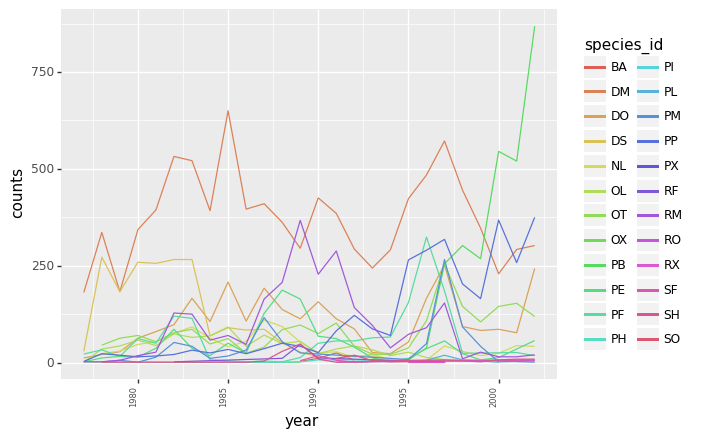

<ggplot: (-9223371901340639664)>

In [97]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts',
                          color='species_id'))
    + p9.geom_line(size=.5)
 + flip_xlabels
)

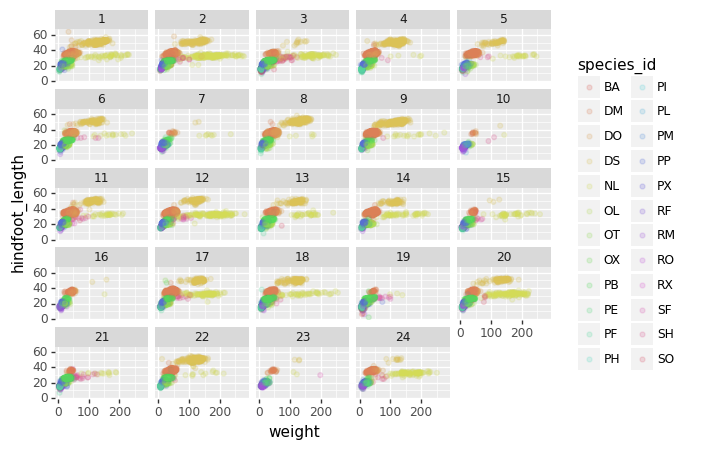

<ggplot: (-9223371901340258448)>

In [56]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("plot_id") + p9.geom_point(alpha=0.1)
)

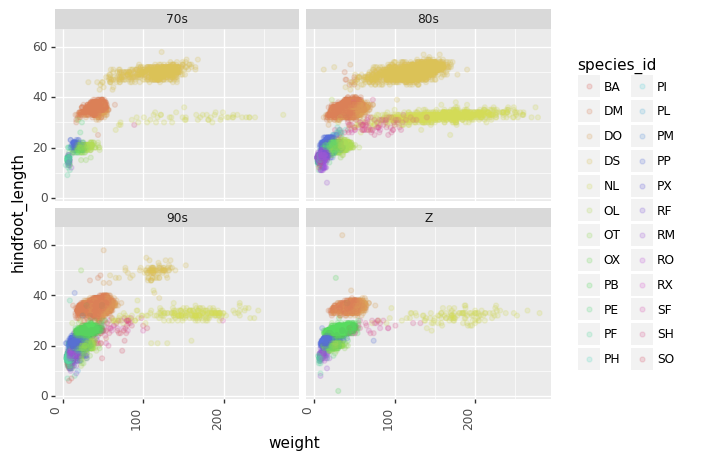

<ggplot: (-9223371901325139756)>

In [57]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("year_bins") + p9.geom_point(alpha=0.1) + flip_xlabels
)

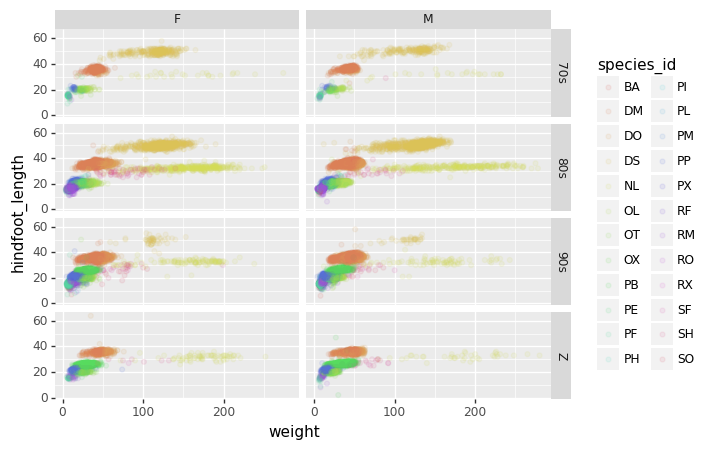

<ggplot: (-9223371901327726012)>

In [58]:
# only select the years of interest
survey_2000 = surveys_complete[surveys_complete["year"].isin([2000, 2001])]

(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_grid("year_bins ~ sex")
)

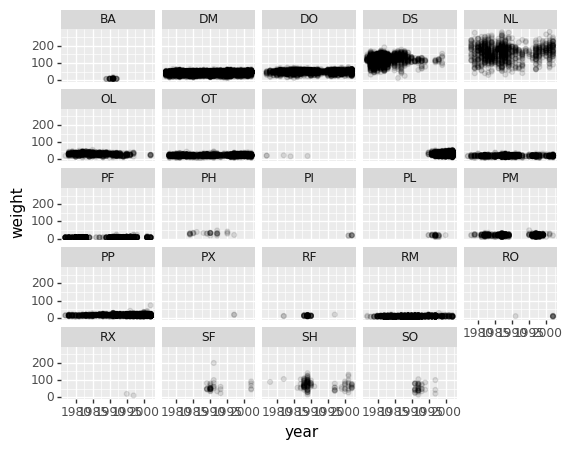

<ggplot: (-9223371901330699432)>

In [61]:

(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='year',
                          y='weight'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("species_id")
)

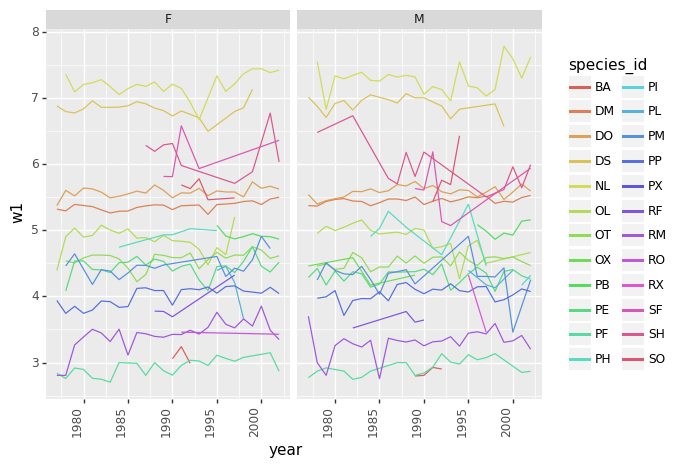

<ggplot: (-9223371901341043152)>

In [73]:
yearly_weight = surveys_complete.groupby(['year', 'species_id', 'sex'])['weight_log'].mean().reset_index(name='w1')

(p9.ggplot(data=yearly_weight,
           mapping=p9.aes(x='year',
                          y='w1', color='species_id'))
    + p9.geom_line()
    + p9.facet_wrap("sex") + flip_xlabels
)


In [75]:
df = pd.DataFrame({'ymin': {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.511,
  5: 0.571,
  6: 0.5329999999999999,
  7: 0.5389999999999999},
 'ymax': {0: 0.511,
  1: 0.571,
  2: 0.533,
  3: 0.539,
  4: 1.0,
  5: 1.0,
  6: 1.0,
  7: 1.0},
 'xmin': {0: 0.0,
  1: 0.14799999999999996,
  2: 0.22400000000000003,
  3: 0.5239999999999999,
  4: 0.0,
  5: 0.14799999999999996,
  6: 0.22400000000000003,
  7: 0.5239999999999999},
 'xmax': {0: 0.148,
  1: 0.22399999999999998,
  2: 0.524,
  3: 1.001,
  4: 0.148,
  5: 0.22399999999999998,
  6: 0.524,
  7: 1.001},
 'variable': {0: 'A', 1: 'A', 2: 'A', 3: 'A', 4: 'B', 5: 'B', 6: 'B', 7: 'B'}})

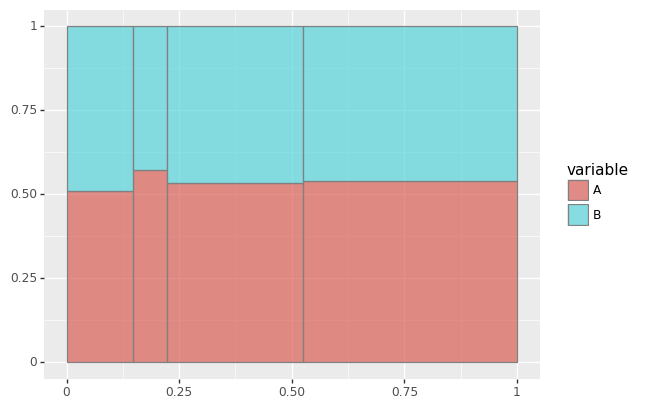

<ggplot: (-9223371935694741196)>

In [76]:
(p9.ggplot(df, p9.aes(ymin = "ymin", ymax = "ymax",
     xmin = "xmin", xmax = "xmax", fill = "variable"))
  + p9.geom_rect(colour = "grey", alpha=0.7)
)

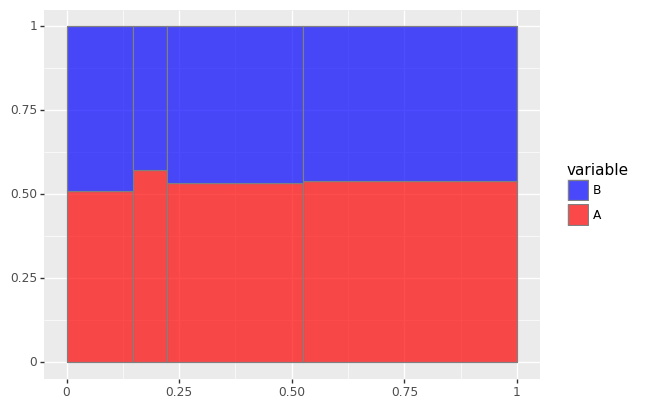

<ggplot: (-9223371935691558556)>

In [78]:
color_dict = {'A': 'red', 
              'B': 'blue'}
df2 = df.assign(variable = pd.Categorical(df['variable'], categories=['B', 'A'], ordered=True))
              
(p9.ggplot(df2, p9.aes(ymin = "ymin", ymax = "ymax",
     xmin = "xmin", xmax = "xmax", fill = "variable"))
 + p9.geom_rect(colour = "grey", alpha=0.7)
#  + p9.scale_color_manual(values=color_dict) 
 + p9.scale_fill_manual(values=color_dict)
)
# print(df2)